# Êï∏ÊìöÂàÜÊûê Á¨¨‰∏ÄÁµÑ ÊúüÊú´Â∞àÈ°å: 
# ÂΩ±ÈüøÊ°ÉÂúíÂ∏ÇÂêÑÂçÄÊàøÂÉπÁöÑËÆäÊï∏ÂàÜÊûêÂèäÊàøÂÉπÈ†êÊ∏¨

### ÁµÑÂì°: ÂºµËÇ≤Ë™†  Ëï≠Âñ¨ÂÆá  ÊùúÊóªÂ∫≠  Êûó‰Ω©Ê¨£

#### Áí∞Â¢ÉÈ†êË®≠

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
import psutil, sys, gc
from scipy import stats
from IPython.display import display, HTML
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets,linear_model
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
# ÂÆöÁæ©ÂáΩÊï∏‰ª•‰æøÂü∑Ë°åËÇ©‰∏¶ËÇ©ÁöÑÂàóÂç∞
def side_by_side(*objs, **kwds):
    from pandas.io.formats.printing import adjoin
    space = kwds.get('space', 4)
    reprs = [repr(obj).split('\n') for obj in objs]
    print (adjoin(space, *reprs))
    print()
    return


# setting params
params = {'legend.fontsize': 'x-large','figure.figsize': (20, 10),
         'axes.labelsize': 'x-large', 'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large', 'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
sns.set_style('whitegrid')
def chinese():
    import platform
    if platform.system() == 'Windows':
        # plt.rcParams['font.sans-serif'] = ['SimHei'] # Ê≠•È©ü‰∏ÄÔºàÊõøÊèõsans-serifÂ≠óÂûãÔºâ
        plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
        plt.rcParams['axes.unicode_minus'] = False  # Ê≠•È©ü‰∫åÔºàËß£Ê±∫Â∫ßÊ®ôËª∏Ë≤†Êï∏ÁöÑË≤†ËôüÈ°ØÁ§∫ÂïèÈ°åÔºâ
    else:
        # plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
        # mpl.rcParams['font.family'] = ['Heiti TC']
        plt.rcParams['font.family'] = ['Heiti TC']
def english():
    # mpl.style.use('classic')
    plt.rcParams['font.sans-serif'] = ['DejaVu']

%config InlineBackend.figure_format ='retina'
%matplotlib inline

## Á∑íË´ñ

#### (a)Project proposal "ÂΩ±ÈüøÊ°ÉÂúíÂ∏ÇÂêÑÂçÄÊàøÂÉπÁöÑËÆäÊï∏ÂàÜÊûêÂèäÊàøÂÉπÈ†êÊ∏¨"
#### (b)Problem statement and motivation"
    1. Problem statement:Èö®ËëóÁ§æÊúÉÁôºÂ±ïÔºåÁ∂ìÊøüËµ∑È£õÔºåÁï∂‰∫∫ÂÄëÂú®ÁîüÊ¥ª‰∏äÊìÅÊúâ‰∫Ü‰∏ÄÂÆöÁöÑÁ∂ìÊøüËÉΩÂäõÈÅéÂæåÔºåÈñãÂßãËøΩÊ±ÇÁâ©Ë≥™‰∏äÁöÑ‰∫´ÂèóÔºåËÄåÂú®ÈÄôÊ®£ÁöÑÈÅéÁ®ãÁï∂‰∏≠ÔºåÊäïË≥áËÆäÊàê‰∫ÜÁêÜË≤°Â∑•ÂÖ∑ÔºåÂÖ∂‰∏≠ÂúüÂú∞Â∞±ÊòØÂ∑•ÂÖ∑‰πã‰∏ÄÔºåÂà§Êñ∑Êú™‰æÜÂú∞ÂçÄÁôºÂ±ïÊΩõËÉΩÔºå‰ª•ÂèäÁõ∏ÈóúÈ£üË°£‰ΩèË°åËÇ≤Ê®ÇÊñπ‰æøÊÄßÁöÑÂéüÂâáÂïèÈ°åÂéªÊ±∫ÂÆöÊú™‰æÜÊΩõÂäõÔºåËÄåÂú®ÈÄôÊ¨°Â∞àÈ°å‰∏äÔºåÊàëÂÄëÈÅ∏ÊìáÂú®Ê°ÉÂúíÂ∏ÇÊî∂ÈõÜÊï∏ÊìöÔºå‰∏¶ÈÄèÈÅé„ÄåÈ£üË°£‰ΩèË°åËÇ≤Ê®Ç„ÄçÂÖ≠È†ÖÊåáÊ®ôÂéªÂàÜÊûê‰∏¶ÊØîËºÉÊ°ÉÂúí13ÂçÄÂêÑÂçÄÁöÑÊàøÂÉπÔºåÈÄèÈÅé‰∏çÂêåÁöÑÊØîÈáçÂéªÂàÜÊûê13ÂçÄÔºåÈÄèÈÅéË¶ñË¶∫ÂåñÂª∫Ê®°ÔºåÂàÜÊûêÁµêÊûúÔºåÈ†êÊ∏¨
    2. motivation:ÊàëÂÄë‰ª•Ëá™Ë∫´ÁöÑÈúÄÊ±ÇÁÇ∫Âá∫ÁôºÈªûÔºåÂ∞ãÊâæÁîüÊ¥ªÂë®ÈÅ≠ÂêÑÁ®ÆÁ¥∞ÁØÄËàáÂïèÈ°åÔºå‰∏¶ÊêúÂ∞ãÂèØÁî®ÁöÑÊï∏Êìö‰æÜÊ∫êÔºåÁôºÁèæÊîøÂ∫úÂÖ∂ÂØ¶Êèê‰æõÂæàÂ§öÁîüÊ¥ª‰∏äÁöÑÊï∏ÊìöÔºå‰æãÂ¶Ç‰∫§ÈÄö„ÄÅÊïôËÇ≤„ÄÅÈ£≤È£üÁ≠âÔºåÁúã‰ººÂπ≥Â∏∏ÊôÆÈÄö‰∏çË¢´Ê≥®ÊÑèÁöÑÊï∏ÊìöÔºåÂÖ∂ÂØ¶Èö±ËóèËëóÂ§ßÂ§ßÁöÑÂ≠∏ÂïèÔºåÂõ†Ê≠§ÊàëÂÄëÊÉ≥ÂÅö‰∏ÄÂÄãÂ∞àÈ°åËÉΩÁ∂úÂêà‰ª•‰∏äÊï∏ÊìöÁöÑÊáâÁî®ÔºåÂ∞á‰∏çÂêåÈ†òÂüüÁµêÂêà‰∏îËûçÊúÉÂá∫‰∏ÄÂÄãÂÖ®Êñ∞‰∏îÂØ¶Áî®ÁöÑÊï∏ÊìöÂàÜÊûêÔºå‰æø‰ª•Êï¥ÂÄãÊ°ÉÂúíÂ∏ÇÁÇ∫‰∏ªËª∏Ôºå‰ª•ÈªÉÈáë‰ΩèÂÆÖÂçÄ(È´òÊàøÂÉπ)‰æÜÂàÜÊûêÂú®Ê°ÉÂúíÂ∏Ç‰∏≠ÔºåÂΩ±ÈüøÊàøÂÉπÁöÑ‰∏ªË¶ÅÁîüÊ¥ªÊ©üËÉΩËÆäÂõ†ÁÇ∫‰ΩïÔºåÈô§‰∫ÜÊÉ≥ÁôºÁèæÊõ¥Â§öÊÑèÊÉ≥‰∏çÂêåÁöÑÁµêÊûúÂ§ñÔºå‰πüÊÉ≥‰∫ÜËß£Ê°ÉÂúíÈÄôÂÄãÂüéÂ∏ÇÁúüÊ≠£ÁöÑÈ≠ÖÂäõÂèäÈù¢Ë≤åÔºå‰∏¶Âä†Ê∑±ÊàëÂÄëÂ∞çÊñºÂ§öÁ®ÆËÆäÂõ†ÁöÑÊìç‰ΩúÊäÄÂ∑ß„ÄÇ
#### (c)Anticipated outcomes
    1.Ë°®Ê†ºÂåñÈªÉÈáë‰ΩèÂÆÖÂçÄ
    ‰ª•ÂçÄÁÇ∫ÂñÆ‰ΩçÔºåÂ∞á‰æùÁÖßÊ°ÉÂúíÂ∏Ç13ÂÄãÂçÄ‰∏çÂêåÊàøÂÉπÈ´ò‰Ωé‰ΩúÊéíÂàó,
    2.KDE
    3.Êèê‰æõËº∏ÂÖ•ÂøÖË¶Å‰πãÁõ∏ÈóúËÆäÂõ†Êï∏ÂÄºÔºåÈ†êÊ∏¨Áõ∏Â∞çÊáâÁöÑÊàøÂÉπ
#### (d)Data sources supplied to the proposed project
    1.‰ª•ÁîüÊ¥ªÊ¢ù‰ª∂ÊúÄÁõ∏ÈóúÁöÑËÄÉÈáèÂõ†Á¥†Ôºå„ÄåÈ£ü„ÄÅË°£„ÄÅ‰Ωè„ÄÅË°å„ÄÅËÇ≤„ÄÅÊ®Ç„ÄçÁÇ∫‰∏ªËª∏ÊêúÂ∞ãÁõ∏ÈóúÁöÑË≥áÊñô
    2.È£ü(ÂçÄÂüüÂÖßÈ§êÂª≥ÂèäÂ∞èÂêÉÊî§Êï∏Èáè) „ÄÅË°£(ÊúçÈ£æÂ∫óÊï∏ÈáèÂèäÂìÅÁâåÁ®ÆÈ°û) „ÄÅ‰Ωè(ÊàøÂÉπ„ÄÅÊ≤ªÂÆâ„ÄÅÂÖ¨ÂÖ±Ë®≠ÊñΩ) „ÄÅË°å(Â§ßÁúæ‰∫§ÈÄöÈÅãËº∏ÂàÜÂ∏ÉÊÉÖÊ≥Å) „ÄÅËÇ≤(Â≠∏Ê†°Êï∏Èáè) „ÄÅÊ®Ç(Â§ßÂûãÂïÜÂ†¥(Âúà) „ÄÅÈÅäÊ®ÇÂ†¥)
    3.ÂêÑÂçÄËàáÈÉΩÂ∏Ç(Âè∞ÂåóÂ∏Ç)ÁöÑÊúÄÁü≠Ë∑ùÈõ¢ 
#### (e)Short essay on the selected learning model(s)
    Áõ∏Èóú‰øÇÊï∏„ÄÅÁ∑öÊÄßÂõûÊ≠∏„ÄÅÊ±∫Á≠ñÊ®π‰∏äÁöÑÂõûÊ≠∏„ÄÅÂõûÊ≠∏Á∏æÊïàË©ï‰º∞„ÄÅ‰∫§ÂèâÈ©óË≠âÁöÑÁ∂≤Ê†ºÊêúÁ¥¢


#### ÂåØÂÖ•Áµ±Ë®àË≥áÊñô

In [3]:
liveDF= pd.read_excel('.//Data/live.xlsx', skiprows = 0, sheet_name = None)
liveavgDF=pd.read_excel('.//Data/liveavg.xlsx')
transDF=pd.read_excel('.//Data/trans.xlsx')
foodDF=pd.read_excel('.//Data/food.xlsx')
teachDF=pd.read_excel('.//Data/teach.xlsx')
funDF=pd.read_excel('.//Data/fun.xlsx')
finalDF=pd.read_excel('.//Data/data.xlsx')

## Êï∏ÊìöÈ°ØÁ§∫

### È£ü

#### Áµ±Ë®àÂêÑÂçÄÂ∞çÊñºÂÖ¨ÊúâÈõ∂ÂîÆÂ∏ÇÂ†¥„ÄÅÂ§úÂ∏Ç„ÄÅÂïÜÂúà„ÄÅ‰æøÂà©ÂïÜÂ∫ó„ÄÅ‰ΩèÂÆøÈ§êÈ£≤ÁîöËá≥ÊòØAPPÁ≠âÁ≠âÔºåÊèê‰æõÈ£üÁâ©‰πãÂ†¥ÊâÄÁöÑÊï∏Èáè

In [4]:
foodDF

Âú∞ÂçÄ  ÂÖ¨ÊúâÈõ∂ÂîÆÂ∏ÇÂ†¥  Â§úÂ∏Ç  ÂïÜÂúà  Â•ΩÂÆ¢appÂ∫óÂÆ∂  ‰æøÂà©ÂïÜÂ∫óÊï∏Èáè  ‰ΩèÂÆøÂèäÈ§êÈ£≤    Á∏ΩË®à
0   Ê°ÉÂúíÂçÄ       2   1   3      300     234   1691  2231
1   ‰∏≠Â£¢ÂçÄ       1   1   3      245     255   1720  2225
2   Âπ≥ÈéÆÂçÄ       1   0   0       43     102    523   669
3   ÂÖ´Âæ∑ÂçÄ       2   1   1       58      89    468   619
4   Ê•äÊ¢ÖÂçÄ       3   0   1       39      72     16   131
5   Â§ßÊ∫™ÂçÄ       2   0   1       74      41    280   398
6   ËòÜÁ´πÂçÄ       2   0   0       55      94    503   654
7   ÈæçÊΩ≠ÂçÄ       1   1   1       50      71    428   552
8   ÈæúÂ±±ÂçÄ       2   0   0       40     110    629   781
9   Â§ßÂúíÂçÄ       2   0   1       34      58    224   319
10  ËßÄÈü≥ÂçÄ       0   0   0       15      34    147   196
11  Êñ∞Â±ãÂçÄ       1   0   0       13      16     87   117
12  Âæ©ËààÂçÄ       0   0   0        3       2     34    39
13   ÂêàË®à      19   4  11      969    1178   6750  8931

### ‰Ωè

#### Â§ßËá¥ËíêÈõÜ Ê°ÉÂúíÂ∏ÇÂêÑÂçÄÊàøÂÉπÔºåÂÖ∂‰∏≠ÂåÖÂê´ÈõªÊ¢Ø‰ΩèÂÆÖ„ÄÅÈÄèÂ§©Âéù„ÄÅÂ•óÊàø„ÄÅÂ∫óÈù¢Á≠âÁ≠âÔºåËÄåÊ≠§Â∞àÈ°å‰∏ªË¶ÅËëóÈáçÂú®ÈõªÊ¢Ø‰ΩèÂÆÖÁöÑÊàøÂÉπ

#### ExcelÊ™î‰∏≠ÊúâÂàÜÈ†Å(sheet)ÔºåÂ∞á‰∏âÂàÜÈ†ÅÂàÜÂà•È°ØÁ§∫

In [5]:
xls=pd.ExcelFile('.//Data/live.xlsx')
xls.sheet_names

['ÂêÑÂçÄÈ´ò‰Ωé', 'Ê®ÇÂ±ãÁ∂≤', '‰ø°Áæ©ÊàøÂ±ã']

#### Áî±Ê®ÇÂ±ãÁ∂≤ Êü•ÊâæÂà∞ÁöÑÊï∏Êìö

In [6]:
liveDF.get('Ê®ÇÂ±ãÁ∂≤')

Unnamed: 0 ‰∏≠Â£¢ÂçÄÔºà320Ôºâ  Unnamed: 2 Unnamed: 3 Unnamed: 4 Âπ≥ÈéÆÂçÄÔºà324Ôºâ  Unnamed: 6  \
0        NaN     ÈõªÊ¢Ø‰ΩèÂÆÖ         ÈÄèÂ§©Âéù         Â•óÊàø         Â∫óÈù¢     ÈõªÊ¢Ø‰ΩèÂÆÖ         ÈÄèÂ§©Âéù   
1      Âπ≥Âùá(Ëê¨)    20.78       23.49      19.96      37.73    16.18       18.42   
2        Ë≥áÊñôÈáè     7988        1770       1276        262     2533        1352   
3         Âú∞ÂùÄ   ‰∏≠Â£¢ÂçÄÂêåÊÖ∂Ë∑Ø  ‰∏≠Â£¢ÂçÄ‰∏≠Â±±Ë∑Ø270Â∑∑     ‰∏≠Â£¢ÂçÄÊñ∞ËààË∑Ø    ‰∏≠Â£¢ÂçÄÈæçÂíå‰∏âË°ó  Âπ≥ÈéÆÂçÄ‰∏≠Ê≠£‰∫åË∑Ø      Âπ≥ÈéÆÂçÄËÇ≤ÈÅîË∑Ø   
4      ÊúÄ‰Ωé(Ëê¨)      2.2         0.4        0.5        8.1      2.6           1   
5         Âú∞ÂùÄ  ‰∏≠Â£¢ÂçÄÂ§ßÂãá‰∏âË°ó      ‰∏≠Â£¢ÂçÄ‰∏≠ÂíåË∑Ø  ‰∏≠Â£¢ÂçÄ‰∏≠Â§ÆË•øË∑Ø‰∫åÊÆµ     ‰∏≠Â£¢ÂçÄÊó•Êñ∞Ë∑Ø   Âπ≥ÈéÆÂçÄÊñ∞Ê¶ÆË∑Ø  Âπ≥ÈéÆÂçÄ‰∏≠Ë±êË∑ØÂçóÂã¢‰∫åÊÆµ   
6      ÊúÄÈ´ò(Ëê¨)     13.2       244.6       58.6      264.9     31.1       111.6   

  Unnamed: 7  Unnamed: 8 ÈæçÊΩ≠ÂçÄÔºà325Ôºâ  ... Unnamed: 43 Unnamed: 44 Â§ßÂúíÂçÄÔºà337Ôºâ  \
0         Â•óÊàø          Â∫óÈù¢    ÈõªÊ¢Ø‰ΩèÂÆÖ   ...          Â•óÊàø          Â∫óÈù¢     ÈõªÊ¢Ø‰ΩèÂÆÖ   
1       13.8       28.64    14.26  ...           0        7.39    22.15   
2        101          91      893  ...           0           1     1335   
3     Âπ≥ÈéÆÂçÄ‰∏≠Ë±êË∑Ø      Âπ≥ÈéÆÂçÄÈæçÂπ≥Ë∑Ø   ÈæçÊΩ≠ÂçÄÊñ∞ÈæçË∑Ø  ...           0         ËèØÈôµÈáå  Â§ßËßÄË∑Ø600Â∑∑   
4        5.7         1.6      1.9  ...           0         7.4      3.6   
5   Âπ≥ÈéÆÂçÄÊ∞ëÊóèË∑Ø‰∫åÊÆµ  Âπ≥ÈéÆÂçÄ‰∏≠Ë±êË∑ØÂçóÂã¢‰∏ÄÊÆµ   ÈæçÊΩ≠ÂçÄÁôæÂπ¥Ë∑Ø  ...           0         NaN     Ëá¥ÈÅ†‰∏ÄË∑Ø   
6       19.8        55.9     30.3  ...           0         NaN     64.9   

  Unnamed: 46 Unnamed: 47 Unnamed: 48 ËòÜÁ´πÂçÄÔºà338Ôºâ Unnamed: 50 Unnamed: 51  \
0         ÈÄèÂ§©Âéù          Â•óÊàø          Â∫óÈù¢     ÈõªÊ¢Ø‰ΩèÂÆÖ         ÈÄèÂ§©Âéù          Â•óÊàø   
1       22.79       20.59       35.06    20.86       19.94        22.4   
2         460          29          41     2998         441         170   
3         Âú≥È†≠Ë∑Ø    ‰∏≠Ê≠£Êù±Ë∑Ø444Â∑∑         Ê∞∏ËààË∑Ø      ‰∏≠Â±±Ë∑Ø       ÈáëÊµ∑Ë°ó2Â∑∑        ÂçóÈ†ÜÂÖ≠Ë°ó   
4         0.2         6.5        15.4      3.5         1.1         4.8   
5      ‰∏≠Â±±ÂçóË∑Ø‰∫åÊÆµ       Â§ßÊàêË∑Ø‰∫åÊÆµ       Êñ∞ÁîüË∑ØÂõõÊÆµ      Â§ßËààË∑Ø    Á´ãÂæ∑Ë°ó1Â∑∑10ÂºÑ         ÂçóÁ¶èË°ó   
6        1049        28.1        83.3      166         168        35.5   

  Unnamed: 52  
0          Â∫óÈù¢  
1       33.62  
2          58  
3        Êµ∑ÊπñÊù±Ë∑Ø  
4        12.3  
5        Âø†Â≠ùË•øË∑Ø  
6       101.9  

[7 rows x 53 columns]

#### Âú®‰ø°Áæ©ÊàøÂ±ã‰∏≠Êü•ÊâæÂà∞ÁöÑÊï∏Êìö

In [7]:
liveDF.get('‰ø°Áæ©ÊàøÂ±ã')

Unnamed: 0 ‰∏≠Â£¢ÂçÄÔºà320Ôºâ Unnamed: 2 Unnamed: 3 Unnamed: 4 Âπ≥ÈéÆÂçÄÔºà324Ôºâ Unnamed: 6  \
0        NaN     ÈõªÊ¢Ø‰ΩèÂÆÖ        ÈÄèÂ§©Âéù         Â•óÊàø         Â∫óÈù¢     ÈõªÊ¢Ø‰ΩèÂÆÖ        ÈÄèÂ§©Âéù   
1      Âπ≥Âùá(Ëê¨)     20.8       23.9       20.1          0     16.2       18.8   
2        Ë≥áÊñôÈáè     7606       1603       1269          0     2522       1234   

  Unnamed: 7 Unnamed: 8 ÈæçÊΩ≠ÂçÄÔºà325Ôºâ  ... Unnamed: 43 Unnamed: 44 Â§ßÂúíÂçÄÔºà337Ôºâ  \
0         Â•óÊàø         Â∫óÈù¢     ÈõªÊ¢Ø‰ΩèÂÆÖ  ...          Â•óÊàø          Â∫óÈù¢     ÈõªÊ¢Ø‰ΩèÂÆÖ   
1       13.8          0     14.3  ...           0           0     22.1   
2         99          0      896  ...           0           0     1349   

  Unnamed: 46 Unnamed: 47 Unnamed: 48 ËòÜÁ´πÂçÄÔºà338Ôºâ Unnamed: 50 Unnamed: 51  \
0         ÈÄèÂ§©Âéù          Â•óÊàø          Â∫óÈù¢     ÈõªÊ¢Ø‰ΩèÂÆÖ         ÈÄèÂ§©Âéù          Â•óÊàø   
1        21.8        20.5           0     21.1        20.2        22.5   
2         481          29           0     2879         415         165   

  Unnamed: 52  
0          Â∫óÈù¢  
1           0  
2           0  

[3 rows x 53 columns]

#### È°ØÁ§∫ÂêÑÂçÄ ÊàøÂÉπÈ´ò‰ΩéÁöÑË∑ØÊÆµ

In [8]:
liveDF.get('ÂêÑÂçÄÈ´ò‰Ωé')

È°ûÂà• ÂÉπÊ†ºÈ°ûÂà•           Âú∞ÂùÄ ÂÉπÊ†ºÈ°ûÂà•.1       Âú∞ÂùÄ.1 È°ûÂà•.1 ÂÉπÊ†ºÈ°ûÂà•.2       Âú∞ÂùÄ.2 ÂÉπÊ†ºÈ°ûÂà•.3  \
0   Â•óÊàø    È´ò       ‰∏≠Â£¢ÂçÄÊñ∞ËààË∑Ø      ‰Ωé  ‰∏≠Â£¢ÂçÄ‰∏≠Â§ÆË•øË∑Ø‰∫åÊÆµ   Â∫óÈù¢      È´ò    ‰∏≠Â£¢ÂçÄÈæçÂíå‰∏âË°ó      ‰Ωé   
1   Â•óÊàø    È´ò       Âπ≥ÈéÆÂçÄ‰∏≠Ë±êË∑Ø      ‰Ωé   Âπ≥ÈéÆÂçÄÊ∞ëÊóèË∑Ø‰∫åÊÆµ   Â∫óÈù¢      È´ò     Âπ≥ÈéÆÂçÄÈæçÂπ≥Ë∑Ø      ‰Ωé   
2   Â•óÊàø    È´ò      ÈæçÊΩ≠ÂçÄÊ∞ëÊ≤ª‰∏âË°ó      ‰Ωé  ÈæçÊΩ≠ÂçÄ‰∏≠Ê≠£Ë∑ØÈªéÂúíÂ∑∑   Â∫óÈù¢      È´ò  ÈæçÊΩ≠ÂçÄ‰∏≠Ë±êË∑Ø‰∏äÊûóÊÆµ      ‰Ωé   
3   Â•óÊàø    È´ò     Ê•äÊ¢ÖÂçÄÊ¢ÖÁçÖË∑Ø‰∫åÊÆµ      ‰Ωé  Ê•äÊ¢ÖÂçÄÊù±Ê£ÆË∑Ø53Â∑∑   Â∫óÈù¢      È´ò     Ê•äÊ¢ÖÂçÄÊ∞∏Âπ≥Ë∑Ø      ‰Ωé   
4   Â•óÊàø    È´ò            ÁÑ°      ‰Ωé          ÁÑ°   Â∫óÈù¢      È´ò  Êñ∞Â±ãÂçÄ‰∏≠Â±±Ë•øË∑Ø‰∫åÊÆµ      ‰Ωé   
5   Â•óÊàø    È´ò    ËßÄÈü≥ÂçÄÊï¨Ê•≠Ë°ó83Â∑∑      ‰Ωé     ËßÄÈü≥ÂçÄ‰∏ÄÂøÉË∑Ø   Â∫óÈù¢      È´ò     ËßÄÈü≥ÂçÄ‰∏≠ËààË∑Ø      ‰Ωé   
6   Â•óÊàø    È´ò       Ê°ÉÂúíÂçÄÈéÆÊ±üË°ó      ‰Ωé     Ê°ÉÂúíÂçÄ‰∏≠ËèØË∑Ø   Â∫óÈù¢      È´ò     Ê°ÉÂúíÂçÄÊÖàÂÖâË°ó      ‰Ωé   
7   Â•óÊàø    È´ò       ÈæúÂ±±ÂçÄËê¨Â£ΩË∑Ø      ‰Ωé    ÈæúÂ±±ÂçÄÊñáÂåñ‰∏âË∑Ø   Â∫óÈù¢      È´ò     ÈæúÂ±±ÂçÄÈï∑Â£ΩË∑Ø      ‰Ωé   
8   Â•óÊàø    È´ò   ÂÖ´Âæ∑ÂçÄ‰∏≠ËèØË∑Ø275Â∑∑      ‰Ωé     ÂÖ´Âæ∑ÂçÄÂíåÂπ≥Ë∑Ø   Â∫óÈù¢      È´ò   ÂÖ´Âæ∑ÂçÄ‰ªãÂ£ΩË∑Ø‰∏ÄÊÆµ      ‰Ωé   
9   Â•óÊàø    È´ò     Â§ßÊ∫™ÂçÄÂ∫∑ËéäË∑Ø‰∫îÊÆµ      ‰Ωé   Â§ßÊ∫™ÂçÄÂì°ÊûóË∑Ø‰∏ÄÊÆµ   Â∫óÈù¢      È´ò    Â§ßÊ∫™ÂçÄ‰∏≠Ê≠£Êù±Ë∑Ø      ‰Ωé   
10  Â•óÊàø    È´ò            ÁÑ°      ‰Ωé          ÁÑ°   Â∫óÈù¢      È´ò     Âæ©ËààÂçÄËèØÈôµÈáå      ‰Ωé   
11  Â•óÊàø    È´ò  Â§ßÂúíÂçÄ‰∏≠Ê≠£Êù±Ë∑Ø444Â∑∑      ‰Ωé   Â§ßÂúíÂçÄÂ§ßÊàêË∑Ø‰∫åÊÆµ   Â∫óÈù¢      È´ò     Â§ßÂúíÂçÄÊ∞∏ËààË∑Ø      ‰Ωé   
12  Â•óÊàø    È´ò      ËòÜÁ´πÂçÄÂçóÈ†ÜÂÖ≠Ë°ó      ‰Ωé     ËòÜÁ´πÂçÄÂçóÁ¶èË°ó   Â∫óÈù¢      È´ò    ËòÜÁ´πÂçÄÊµ∑ÊπñÊù±Ë∑Ø      ‰Ωé   

          Âú∞ÂùÄ.3  
0       ‰∏≠Â£¢ÂçÄÊó•Êñ∞Ë∑Ø  
1   Âπ≥ÈéÆÂçÄ‰∏≠Ë±êË∑ØÂçóÂã¢‰∏ÄÊÆµ  
2       ÈæçÊΩ≠ÂçÄÂåóÈæçË∑Ø  
3       Ê•äÊ¢ÖÂçÄÂ§ßÊàêË∑Ø  
4     Êñ∞Â±ãÂçÄÊ∞ëÊóèË∑ØÂÖ≠ÊÆµ  
5       ËßÄÈü≥ÂçÄ‰∏≠Â±±Ë∑Ø  
6       Ê°ÉÂúíÂçÄ‰∏≠Ê≠£Ë∑Ø  
7      ÈæúÂ±±ÂçÄÊñáÂåñ‰∏âË∑Ø  
8     ÂÖ´Âæ∑ÂçÄ‰ªãÂ£ΩË∑Ø‰∏ÄÊÆµ  
9       Â§ßÊ∫™ÂçÄÂíåÂπ≥Ë∑Ø  
10           ÁÑ°  
11    Â§ßÂúíÂçÄÊñ∞ÁîüË∑ØÂõõÊÆµ  
12     ËòÜÁ´πÂçÄÂø†Â≠ùË•øË∑Ø

### Ê®Ç

#### ÂêÑÂçÄËÉΩÊèê‰æõÂ®õÊ®Ç‰πãÂ†¥ÊâÄÁöÑÊï∏ÈáèÔºåÂ¶ÇÈõªÂΩ±Èô¢„ÄÅÁôæË≤®ÂÖ¨Âè∏„ÄÅÈÅãÂãï‰∏≠ÂøÉ„ÄÅÁí∞Â¢ÉÊïôËÇ≤È§®„ÄÅÂ∏ÇÂ†¥„ÄÅÂúñÊõ∏È§®Á≠â

In [10]:
funDF

Âú∞ÂçÄ  ÈõªÂΩ±  ÁôæË≤®ÂÖ¨Âè∏  ÈÅäÊ®ÇÂ†¥  ÈÅãÂãï‰∏≠ÂøÉ  Áí∞Â¢ÉÊïôËÇ≤È§®  Â∏ÇÂ†¥  ÂúñÊõ∏È§®  Á∏ΩÂÖ±
0   Ê°ÉÂúíÂçÄ   4     3    0     3      1   2    6  19
1   ‰∏≠Â£¢ÂçÄ   4     3    0     1      2   2    3  15
2   Âπ≥ÈéÆÂçÄ   0     0    0     2      0   1    2   5
3   ÂÖ´Âæ∑ÂçÄ   2     1    0     0      0   2    2   7
4   Ê•äÊ¢ÖÂçÄ   0     0    0     0      1   3    3   7
5   Â§ßÊ∫™ÂçÄ   0     0    0     0      2   2    2   6
6   ËòÜÁ´πÂçÄ   1     1    0     1      0   2    4   9
7   ÈæçÊΩ≠ÂçÄ   0     0    1     0      2   1    1   5
8   ÈæúÂ±±ÂçÄ   0     0    0     0      0   2    4   6
9   Â§ßÂúíÂçÄ   0     0    0     0      0   2    2   4
10  ËßÄÈü≥ÂçÄ   0     0    0     0      1   0    1   2
11  Êñ∞Â±ãÂçÄ   0     0    0     0      0   1    3   4
12  Âæ©ËààÂçÄ   0     0    0     0      1   0    1   2

### ‰∫§ÈÄö

#### Áµ±Ë®àÂêÑÂçÄÁöÑÂÖçË≤ªÂ∏ÇÊ∞ëÂÖ¨Ëªä„ÄÅÁ∂ìÈÅéÂêÑÂçÄÁöÑÁÅ´ËªäÁ´ô„ÄÅÊç∑ÈÅãÁ´ôÊï∏ÈáèÂèäubikeÂÅúÊîæÈªûÊï∏Èáè

In [11]:
transDF

Unnamed: 0  ÂÖçË≤ªÂÖ¨Ëªä  ÁÅ´Ëªä  Êç∑ÈÅã  ubike   ÂêàË®à
0         Ê°ÉÂúíÂçÄ    12   1   0     86   99
1         ‰∏≠Â£¢ÂçÄ     9   2   6     91  108
2         Âπ≥ÈéÆÂçÄ     9   0   0     26   35
3         ÂÖ´Âæ∑ÂçÄ     8   0   0     31   39
4         Ê•äÊ¢ÖÂçÄ     9   4   0     11   24
5         Â§ßÊ∫™ÂçÄ     3   0   0      9   12
6         ËòÜÁ´πÂçÄ     9   0   2     28   39
7         ÈæçÊΩ≠ÂçÄ    10   0   0     13   23
8         ÈæúÂ±±ÂçÄ     8   0   3     41   52
9         Â§ßÂúíÂçÄ     8   0   7     11   26
10        ËßÄÈü≥ÂçÄ     8   0   0      4   12
11        Êñ∞Â±ãÂçÄ     2   0   0      3    5
12        Âæ©ËààÂçÄ     6   0   0      0    6

### ÊïôËÇ≤

#### Áµ±Ë®àÂêÑÂçÄÂπºÁ®öÂúí„ÄÅÂúãÊ∞ëÂ∞èÂ≠∏„ÄÅÂúãÊ∞ë‰∏≠Â≠∏„ÄÅÈ´òÁ¥ö‰∏≠Á≠âÂ≠∏Ê†°„ÄÅÂ∞àÁßëÂ§ßÂ≠∏ÂèäÂ§ßÂ≠∏Êï∏Èáè

In [12]:
teachDF

Unnamed: 0  ÂπºÂÖíÂúí  ÂúãÊ∞ë\nÂ∞èÂ≠∏  ÂúãÊ∞ë\n‰∏≠Â≠∏  È´òÁ¥ö‰∏≠Á≠âÂ≠∏Ê†°  Â∞àÁßë\nÂ≠∏Ê†°  Â§ßÂ≠∏   Áµ±Ë®à
0        1Ê°ÉÂúíÂçÄ  137      23      15       6       0   1  182
1        2‰∏≠Â£¢ÂçÄ  146      23      11       6       1   3  190
2        3Âπ≥ÈéÆÂçÄ   81      14       7       4       0   1  107
3        4ÂÖ´Âæ∑ÂçÄ   38       9       3       2       0   0   52
4        5Ê•äÊ¢ÖÂçÄ   59      14       9       4       0   0   86
5        6Â§ßÊ∫™ÂçÄ   34      14       2       2       0   0   52
6        7ËòÜÁ´πÂçÄ   80      14       4       1       0   1  100
7        8ÈæçÊΩ≠ÂçÄ   45      11       5       3       0   0   64
8        9ÈæúÂ±±ÂçÄ   58      17       4       3       0   3   85
9       10Â§ßÂúíÂçÄ   24      12       2       2       0   0   40
10      11ËßÄÈü≥ÂçÄ   27       9       3       1       0   1   41
11      12Êñ∞Â±ãÂçÄ   16      10       4       2       0   0   32
12      13Âæ©ËààÂçÄ   14       7       1       1       0   0   23

### Á∏ΩÊï¥ÁêÜ

#### Âà©Áî®ÂêÑÊï∏ÊìöÁöÑÁ∏ΩÂíå ÂÅöÂá∫Ë°®

In [13]:
finalDF

Unnamed: 0  food    live  traffic  recreation  education
0         Ê°ÉÂúíÂçÄ  2231  20.425       99          19        182
1         ‰∏≠Â£¢ÂçÄ  2225  20.370      108          15        190
2         Âπ≥ÈéÆÂçÄ   669  14.990       35           5        107
3         ÂÖ´Âæ∑ÂçÄ   619  16.400       39           7         52
4         Ê•äÊ¢ÖÂçÄ   131  11.895       24           7         86
5         Â§ßÊ∫™ÂçÄ   398  12.645       12           6         52
6         ËòÜÁ´πÂçÄ   654  21.630       39           9        100
7         ÈæçÊΩ≠ÂçÄ   552  13.145       23           5         64
8         ÈæúÂ±±ÂçÄ   781  22.315       52           6         85
9         Â§ßÂúíÂçÄ   319  21.370       26           4         40
10        ËßÄÈü≥ÂçÄ   196  16.665       12           2         41
11        Êñ∞Â±ãÂçÄ   117  14.080        5           4         32
12        Âæ©ËààÂçÄ    39   8.830        6           2         23

## ‰æùÁÖßÊàøÂÉπÈ´ò‰ΩéÂÅöÊéíÂ∫è

In [14]:
HoursePriceDF= finalDF.drop(['food','traffic','recreation','education'],axis=1)
HoursePriceDF

Unnamed: 0    live
0         Ê°ÉÂúíÂçÄ  20.425
1         ‰∏≠Â£¢ÂçÄ  20.370
2         Âπ≥ÈéÆÂçÄ  14.990
3         ÂÖ´Âæ∑ÂçÄ  16.400
4         Ê•äÊ¢ÖÂçÄ  11.895
5         Â§ßÊ∫™ÂçÄ  12.645
6         ËòÜÁ´πÂçÄ  21.630
7         ÈæçÊΩ≠ÂçÄ  13.145
8         ÈæúÂ±±ÂçÄ  22.315
9         Â§ßÂúíÂçÄ  21.370
10        ËßÄÈü≥ÂçÄ  16.665
11        Êñ∞Â±ãÂçÄ  14.080
12        Âæ©ËààÂçÄ   8.830

In [16]:
HoursePriceDF=HoursePriceDF.sort_values('live',ascending=False) 
HoursePriceDF.reset_index(drop=True)

Unnamed: 0    live
0         ÈæúÂ±±ÂçÄ  22.315
1         ËòÜÁ´πÂçÄ  21.630
2         Â§ßÂúíÂçÄ  21.370
3         Ê°ÉÂúíÂçÄ  20.425
4         ‰∏≠Â£¢ÂçÄ  20.370
5         ËßÄÈü≥ÂçÄ  16.665
6         ÂÖ´Âæ∑ÂçÄ  16.400
7         Âπ≥ÈéÆÂçÄ  14.990
8         Êñ∞Â±ãÂçÄ  14.080
9         ÈæçÊΩ≠ÂçÄ  13.145
10        Â§ßÊ∫™ÂçÄ  12.645
11        Ê•äÊ¢ÖÂçÄ  11.895
12        Âæ©ËààÂçÄ   8.830

#### ÊàëÂÄëÂú®Ë°®‰∏≠ÂèØÂæóÁü• ÊàøÂÉπÊúÄÈ´òÁöÑ‰æùÂ∫èÊòØÈæúÂ±±ÂçÄ„ÄÅËòÜÁ´πÂçÄ„ÄÅÂ§ßÂúíÂçÄÔºåÂÜç‰æÜÊâçÊòØÊàëÂÄëÁÜüÊÇâÁöÑÊ°ÉÂúíÂçÄÔºåÈÄôËàáÊàëÂÄëÈ†êÊÉ≥ÁöÑ‰ª•ÁÇ∫ÁπÅËèØÁÜ±È¨ßÁöÑÊ°ÉÂúíÂçÄÂíå‰∏≠Â£¢ÂçÄ ÊúÉÊòØÊàøÂÉπÈ´òÁöÑÂâç‰∏Ä‰∫åÂêçÔºåÊúâÊ•µÂ§ßÁöÑËêΩÂ∑ÆÔºåËÄåÊàëÂÄëÂæûÈÄôË£°ËëóÊâãÊé¢Ë®éÔºåÂΩ±ÈüøÊàøÂÉπÁöÑÂõ†Á¥†ÁÇ∫‰Ωï

## Áõ∏Èóú‰øÇÊï∏ÂàÜÊûê

#### Â∞á‰∏äÈù¢Êî∂ÈõÜÂà∞ÁöÑÊï∏Êìö ÂÅöÁõ∏Èóú‰øÇÊï∏ÁöÑÂàÜÊûêÂèäËßÄÂØü

In [17]:
fig,ax = plt.subplots(figsize=(20,8))
fig.suptitle("Heatmap Plot", fontsize=30)
fig.subplots_adjust(top=0.76) 
ax.set_title("1. Correlation between temp and atemp is very high (as expected).\n"+
             "2. Same is the case with registered-total_count and casual-total_count.\n"+
             "3. Windspeed to humidity has negative correlation.\n"+
             "4. Overall correlational statistics are not very high.", fontsize=20)
corrcoef = finalDF.corr()
mask = np.array(corrcoef)
mask[np.tril_indices_from(mask)] = False
# sns.heatmap(corrcoef, mask=mask, vmax=.8, square=True, annot=True, ax=ax)
sns.heatmap(corrcoef, mask=mask, vmax=.8, annot=True, ax=ax)
plt.show();

#### ÊàëÂÄëÁôºÁèæ ÔºåÊàøÂÉπÁöÑÈ´ò‰ΩéÔºåËàáÂÖ∂‰ªñÁîüÊ¥ªÊ©üËÉΩÔºåÊ≤íÊúâÊòéÈ°ØÁâπÂÆöÂ∞çÊüê‰∏ÄÈ†ÖÊúâÈ´òÂ∫¶Ê≠£Áõ∏ÈóúÔºåË®éË´ñÈÅéÂæåÊ±∫ÂÆöÂ∞áÁõ∏Â∞çÁöÑÂú∞ÁêÜ‰ΩçÁΩÆ‰πüÂä†ÂÖ•ÂèÉËÄÉËÆäÊï∏‰∏≠ÔºåÊñºÊòØÊñ∞Â¢û‰∫Ü‰∏ÄÂàó:ÂêÑÂçÄËàáÈÉΩÂ∏Ç(ÈÄôË£°‰ª•Âè∞ÂåóÂ∏ÇÁÇ∫‰æã)ÁöÑÊúÄÁü≠Ë∑ùÈõ¢Êï∏Êìö

#### ÂêÑÂçÄËàáÈÉΩÂ∏Ç(Âè∞ÂåóÂ∏Ç)ÁöÑÊúÄÁü≠Ë∑ùÈõ¢

In [18]:
c_distanceDF=pd.read_excel('.//Data/cDistance.xlsx')
c_distanceDF

Unnamed: 0  city distance
0         Ê°ÉÂúíÂçÄ           31.1
1         ‰∏≠Â£¢ÂçÄ           42.3
2         Âπ≥ÈéÆÂçÄ           42.6
3         ÂÖ´Âæ∑ÂçÄ           33.1
4         Ê•äÊ¢ÖÂçÄ           51.4
5         Â§ßÊ∫™ÂçÄ           38.3
6         ËòÜÁ´πÂçÄ           32.5
7         ÈæçÊΩ≠ÂçÄ           48.1
8         ÈæúÂ±±ÂçÄ           24.7
9         Â§ßÂúíÂçÄ           45.6
10        ËßÄÈü≥ÂçÄ           53.5
11        Êñ∞Â±ãÂçÄ           56.9
12        Âæ©ËààÂçÄ           78.7

#### Âêà‰ΩµËá≥finalDFË°®Ê†º‰∏≠

In [19]:
finalDF['city distance']=c_distanceDF['city distance']
finalDF

Unnamed: 0  food    live  traffic  recreation  education  city distance
0         Ê°ÉÂúíÂçÄ  2231  20.425       99          19        182           31.1
1         ‰∏≠Â£¢ÂçÄ  2225  20.370      108          15        190           42.3
2         Âπ≥ÈéÆÂçÄ   669  14.990       35           5        107           42.6
3         ÂÖ´Âæ∑ÂçÄ   619  16.400       39           7         52           33.1
4         Ê•äÊ¢ÖÂçÄ   131  11.895       24           7         86           51.4
5         Â§ßÊ∫™ÂçÄ   398  12.645       12           6         52           38.3
6         ËòÜÁ´πÂçÄ   654  21.630       39           9        100           32.5
7         ÈæçÊΩ≠ÂçÄ   552  13.145       23           5         64           48.1
8         ÈæúÂ±±ÂçÄ   781  22.315       52           6         85           24.7
9         Â§ßÂúíÂçÄ   319  21.370       26           4         40           45.6
10        ËßÄÈü≥ÂçÄ   196  16.665       12           2         41           53.5
11        Êñ∞Â±ãÂçÄ   117  14.080        5           4         32           56.9
12        Âæ©ËààÂçÄ    39   8.830        6           2         23           78.7

#### ÂÜçÊ¨°ÈÄ≤Ë°åÁõ∏Èóú‰øÇÊï∏ÁöÑËßÄÂØü

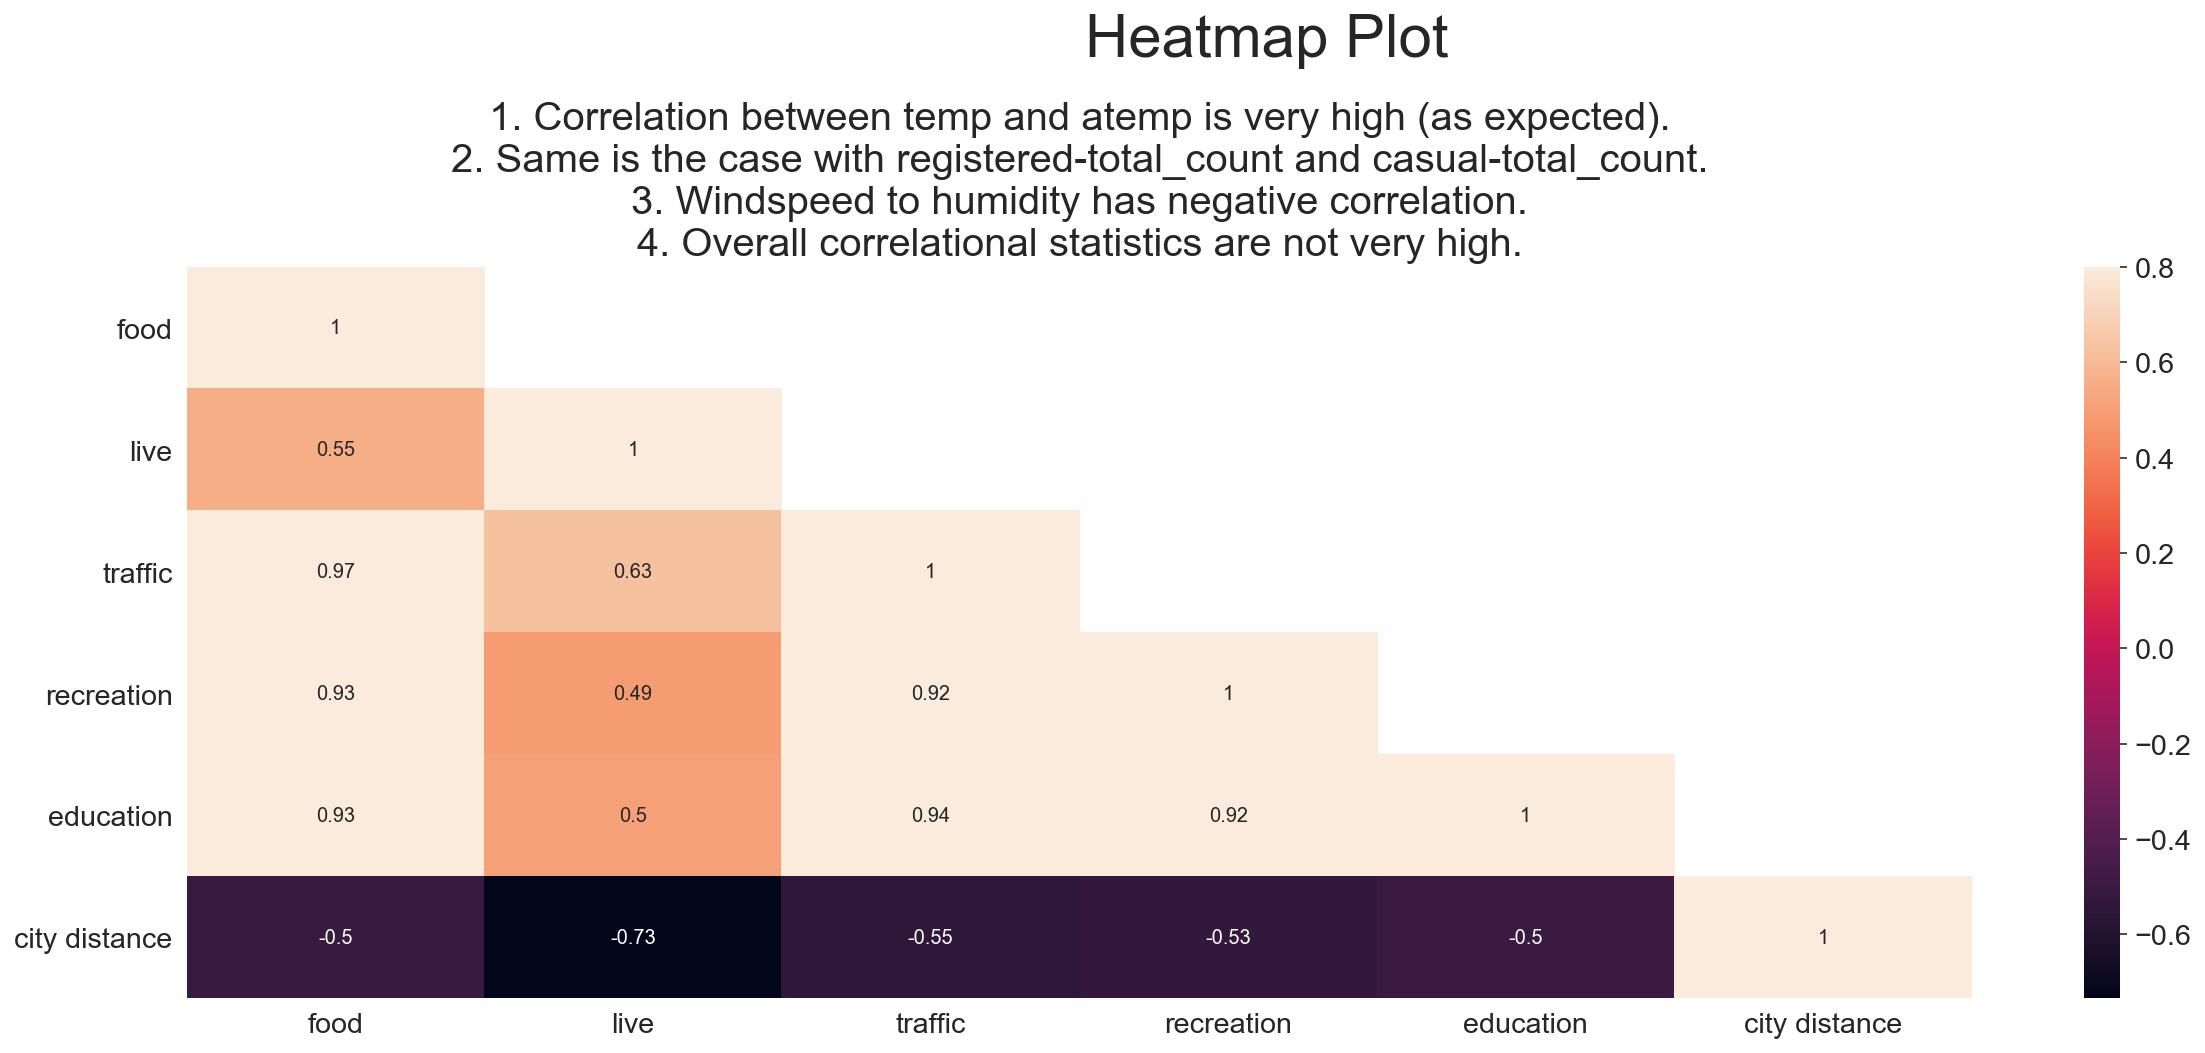

In [20]:
fig,ax = plt.subplots(figsize=(20,8))
fig.suptitle("Heatmap Plot", fontsize=30)
fig.subplots_adjust(top=0.76) 
ax.set_title("1. Correlation between temp and atemp is very high (as expected).\n"+
             "2. Same is the case with registered-total_count and casual-total_count.\n"+
             "3. Windspeed to humidity has negative correlation.\n"+
             "4. Overall correlational statistics are not very high.", fontsize=20)
corrcoef = finalDF.corr()
mask = np.array(corrcoef)
mask[np.tril_indices_from(mask)] = False
# sns.heatmap(corrcoef, mask=mask, vmax=.8, square=True, annot=True, ax=ax)
sns.heatmap(corrcoef, mask=mask, vmax=.8, annot=True, ax=ax)
plt.show();

#### ÊàëÂÄëÊé°Áî®‰∫ÜÂÖ©ÂÄãÁõ∏Èóú‰øÇÊï∏ÊúÄÈ´òÂíåÊúÄ‰Ωé‰πãËÆäÊï∏Ôºå‰∫§ÈÄö‰ª•ÂèäËàáÂüéÂ∏ÇÁöÑË∑ùÈõ¢„ÄÇ
#### ‰∫§ÈÄöÁÇ∫0.63 ËàáÂüéÂ∏ÇÁöÑË∑ùÈõ¢ÁÇ∫-0.73 

### ÂèñËàáÊàøÂÉπ(live) È´òÂ∫¶Ê≠£Áõ∏Èóú/Ë≤†Áõ∏Èóú‰πãÁâπÂæµ

#### ËàáÂüéÂ∏ÇÁöÑË∑ùÈõ¢ÂíåÊàøÂÉπÁöÑÈóú‰øÇ

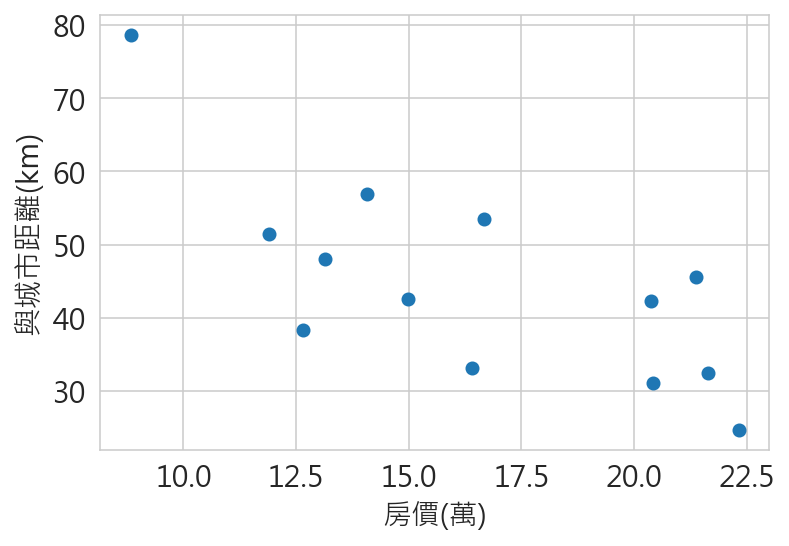

In [21]:
chinese()
X = finalDF['live']
Y = finalDF['city distance'] 
regr=linear_model.LinearRegression()
plt.xlabel('ÊàøÂÉπ(Ëê¨)')
plt.ylabel('ËàáÂüéÂ∏ÇË∑ùÈõ¢(km)')
model = LinearRegression(fit_intercept=True)
model.fit(X[:, np.newaxis], Y)
plt.scatter(X, Y)

#### ÂèØ‰ª•È°ØÁ§∫Âá∫ Ë∑ùÈõ¢ÈÉΩÂ∏ÇË∂äËøë ÊàøÂÉπÂ∞±Ë∂äÈ´ò

#### ‰∫§ÈÄöËàáÊàøÂÉπÁöÑÈóú‰øÇ

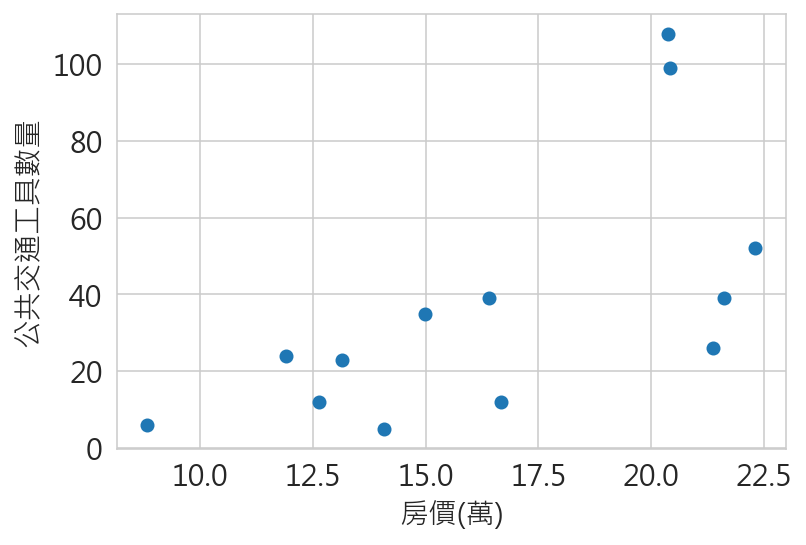

In [32]:
chinese()
X = finalDF['live']
Y = finalDF['traffic'] 
regr=linear_model.LinearRegression()
plt.xlabel('ÊàøÂÉπ(Ëê¨)')
plt.ylabel('ÂÖ¨ÂÖ±‰∫§ÈÄöÂ∑•ÂÖ∑Êï∏Èáè')
model = LinearRegression(fit_intercept=True)
model.fit(X[:, np.newaxis], Y)
plt.scatter(X, Y)

#### Áî±Ê≠§ÂèØÁü•ÔºåÂÖ¨ÂÖ±‰∫§ÈÄöÂ∑•ÂÖ∑ËºÉÂ§öÁöÑÂçÄÂüüÔºåÊàøÂÉπËºÉÈ´ò

### Âà©Áî®Ëø¥Ê≠∏‰øÇÊï∏ÂÅöÊàøÂÉπÁöÑÈ†êÊ∏¨

#### Âà©Áî®ÊàëÂÄëËßÄÂØüÂà∞ÁöÑ ÂÖ©È†ÖËÆäÊï∏:‰∫§ÈÄöÂíåËàáÈÉΩÂ∏ÇÁöÑË∑ùÈõ¢ÔºåÊÉ≥Ë©¶Ë©¶ÊòØÂê¶ËÉΩÁî±Ê≠§ËÆäÊï∏È†êÊ∏¨ÊàøÂÉπ

#### Âª∫Á´ãËÆäÊï∏ÂÄº
##### ÂÖ¨ÂÖ±‰∫§ÈÄöÂ∑•ÂÖ∑Êï∏ÈáèÂíåËàáÈÉΩÂ∏ÇÁöÑË∑ùÈõ¢ ÊîæÂú® feature‰∏≠

In [24]:
feature= finalDF.drop(['Unnamed: 0','food','live','education','recreation'],axis=1)
feature

traffic  city distance
0        99           31.1
1       108           42.3
2        35           42.6
3        39           33.1
4        24           51.4
5        12           38.3
6        39           32.5
7        23           48.1
8        52           24.7
9        26           45.6
10       12           53.5
11        5           56.9
12        6           78.7

##### ÊàøÂÉπÊîæÂú®price‰∏≠

In [33]:
price=finalDF['live']
price

0     20.425
1     20.370
2     14.990
3     16.400
4     11.895
5     12.645
6     21.630
7     13.145
8     22.315
9     21.370
10    16.665
11    14.080
12     8.830
Name: live, dtype: float64

#### ÊàøÂÉπÂÅöÂü∫Êú¨ÈÅãÁÆó ‰∏¶ËßÄÂØü

In [26]:
price.describe()

count    13.000000
mean     16.520000
std       4.364163
min       8.830000
25%      13.145000
50%      16.400000
75%      20.425000
max      22.315000
Name: live, dtype: float64

### TÊ™¢ÂÆöËàáp-value

#### Âú®Ë™≤Á®ã‰∏≠ÊúâÊèêÂà∞ÔºåÁï∂ÊàëÂÄëÊ®£Êú¨Êï∏‰∏çÂ§öÊôÇ(n<30)ÔºåÈúÄË¶ÅÁ¢∫ÂÆöÂÖ©ÂÄãÁç®Á´ãÊ®£Êú¨Êï∏ÊìöÁµÑ‰πãÈñìÊòØÂê¶Â≠òÂú®Áµ±Ë®àÂ≠∏‰∏äÁöÑÈ°ØËëóÂ∑ÆÁï∞ÊôÇÔºåÂèØ‰ª•‰ΩøÁî®tÊ™¢ÂÆöÔºõ‰∏¶ËßÄÂØüp-valueÊòØÂê¶<0.5Ôºå>0.05Âú®Áµ±Ë®àÂ≠∏‰∏ä‰ª£Ë°®‰∏çÈ°ØËëóÔºåÊúÉ‰∏çÂèÉËÄÉÂÖ∂Êï∏Êìö

In [29]:
tValue, pValue = stats.ttest_ind(feature['traffic'], price, equal_var=True)
if pValue < 0.05:
    side_by_side("p value is "+str(np.round(pValue,3)), "Reject 'The sales difference is NOT significant.'")
else:
    side_by_side("p value is "+str(np.round(pValue,3)), "Can not reject 'The sales difference is NOT significant.'")

'p value is 0.035'    "Reject 'The sales difference is NOT significant.'"



In [30]:
tValue, pValue = stats.ttest_ind(feature['city distance'], price, equal_var=True)
if pValue < 0.05:
    side_by_side("p value is "+str(np.round(pValue,3)), "Reject 'The difference is NOT significant.'")
else:
    side_by_side("p value is "+str(np.round(pValue,3)), "Can not reject 'The difference is NOT significant.'")

'p value is 0.0'    "Reject 'The sales difference is NOT significant.'"



#### Âú®p-value‰∏≠ ‰∫§ÈÄöÁÇ∫0.035ÔºåËàáÈÉΩÂ∏ÇÁöÑË∑ùÈõ¢ÁÇ∫0.0 ÔºåËôõÁÑ°ÂÅáË®≠ÊúÉË¢´Âê¶ÂÆö‰∏¶‰∏çÂèØÊé•Âèó

### Âª∫Á´ãÂü∫Á§éÊ®°Âûã

#### ÂàÜÂâ≤ÊØî‰æãÁÇ∫:80%ÁöÑÊï∏ÊìöÁî®ÊñºË®ìÁ∑¥Ôºå20%Áî®ÊñºÊ∏¨Ë©¶ÔºõË®≠ÂÆörandom_state=22

In [27]:
X_train, X_test, y_train, y_test = train_test_split(feature, price, test_size=0.2, random_state=22)

side_by_side("Training set: data:{} and target:{}".format(X_train.shape,y_train.shape),
             "Testing set: data:{} and target:{}".format(X_test.shape,y_test.shape))

'Training set: data:(10, 2) and target:(10,)'    'Testing set: data:(3, 2) and target:(3,)'



#### Ëø¥Ê≠∏‰øÇÊï∏ÂàÜÊï∏

In [34]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,y_train)
LR.score(X_test,y_test)

0.9206948145251567

#### 0.92ÁöÑÂàÜÊï∏ ÈÇÑ‰∏çÈåØÔºå‰ΩÜ‰πüÊúâÂèØËÉΩÊòØÊàëÂÄëÁöÑË≥áÊñôÈáèÈÅé‰ΩéËÄåÂ∞éËá¥train Âíå test ÁöÑÊï∏ÈáèÂèäÊ¨°Êï∏‰∏çÂ§†Â§öÔºåÊ≠§Ê®°ÂûãÈÇÑ‰∏çÂ§†ÊàêÁÜüÂÆåÂñÑ

### Ê∏¨È©óÊ®°Âûã

### È†êÊ∏¨Á¢∫ÂÆö‰øÇÊï∏(coefficient of determination)
#### Lecture 5 (1.2)
#### Âà©Áî® ùëÖ2‰ΩúÂàÜÊûêÔºåÂèØËÉΩÁöÑÊúÄÈ´òÂæóÂàÜÁÇ∫1.0Ôºå‰∏¶‰∏îÂèØËÉΩÁÇ∫Ë≤†(Âõ†ÁÇ∫Ë©≤Ê®°ÂûãÂü∑Ë°åÁöÑÂæàÂ∑Æ)„ÄÇ

In [39]:
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    score = r2_score(y_true, y_predict)
    return score

#### Êü•ÊâæÊúÄ‰Ω≥ÁöÑmodelÔºå‰∫§ÂèâÈ©óË≠âÁöÑÁ∂≤Ê†ºÊêúÁ¥¢

#### Leture 5 ÁöÑÂÖßÂÆπ(3.3.1)

In [132]:
from sklearn.model_selection import KFold,GridSearchCV #ÁàÜÂäõÊêúÂ∞ã,Á∂≤Ê†ºÊêúÂ∞ã
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import make_scorer

def search_model(X, y):
    cross_validator = KFold()
    regressor = DecisionTreeRegressor()
    params = {'max_depth':[2]} 
    scoring_fnc = make_scorer(performance_metric)
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cross_validator)
    grid = grid.fit(X, y)
    return grid.best_estimator_

In [140]:
best_reg = search_model(X_train, y_train)

### ÂØ¶ÈöõÈ†êÊ∏¨

In [141]:
testData = [[5,56.9],[99,31.1]] #ÂÅáË®≠È°ßÂÆ¢ÈÅ∏ÊìáÁöÑ[ÂÖ¨ÂÖ±‰∫§ÈÄöÂ∑•ÂÖ∑Êï∏Èáè,ËàáÈÉΩÂ∏ÇÁöÑË∑ùÈõ¢]

result = best_reg.predict(testData)
for i, price in enumerate(result):
    side_by_side( "Á¨¨{}‰ΩçÈ°ßÂÆ¢È†ê‰º∞ÊàøÂÉπ: {}Ëê¨/Âù™".format(i+1, price))

'Á¨¨1‰ΩçÈ°ßÂÆ¢È†ê‰º∞ÊàøÂÉπ: 15.372499999999999Ëê¨/Âù™'

'Á¨¨2‰ΩçÈ°ßÂÆ¢È†ê‰º∞ÊàøÂÉπ: 21.456666666666667Ëê¨/Âù™'



## ÂøÉÂæóËàáË®éË´ñ

#### Êú¨Â∞àÈ°åÊ≠§Ê¨°ÈÄèÈÅéÈ£ü„ÄÅË°£„ÄÅ‰Ωè„ÄÅË°åÁ≠âÂõõÂÄãÂõ†Á¥†ÔºåÂàÜÊûêÊ°ÉÂúíÂ∏ÇÂÖ±ÂçÅ‰∏âÂçÄÊúÉÂΩ±ÈüøÁõ∏ÈóúÊàøÂÉπËÆäÊï∏ÔºåÂÖ∂‰∏≠È£üÈÉ®ÂàÜÔºåÈÄèÈÅéGoogle MapÊî∂ÈõÜÂêÑÂçÄÁõ∏ÈóúÈ§êÈ£≤ÂìÅÁâåÂèäÂú®Âú∞ÁâπËâ≤Â∞èÂêÉÔºåÂÖ∂‰∏≠‰ª•„ÄåÊ°ÉÂúíÂçÄ„ÄçÂèä„Äå‰∏≠Â£¢ÂçÄ„ÄçÁöÑÈ§êÈ£≤ÂàÜ‰ΩàÁ∏ΩÈáèÈÅ†ÈÅ†Ë∂ÖÈÅéÂÖ∂‰ªñÂçÄÔºåËÄåÂú®Ë°£ÁöÑÈÉ®ÂàÜÔºåÊàëÂÄë‰πüÊòØÈÄèÈÅéGoogle MapÊî∂ÈõÜÂêÑÂçÄÁõ∏ÈóúÊúçÈ£æÂìÅÁâå‰ª•ÂèäÂÄã‰∫∫ÁâπËâ≤Â∫óÁÇ∫Êï∏ÊìöÔºåÂÖ∂‰∏≠‰ª•„ÄåÊ°ÉÂúíÂçÄ„ÄçÂèä„Äå‰∏≠Â£¢ÂçÄ„ÄçÁöÑÈ§êÈ£≤ÂàÜ‰ΩàÁ∏ΩÈáèÈÅ†ÈÅ†Ë∂ÖÈÅéÂÖ∂‰ªñÂçÄÔºå‰ΩèÁöÑÈÉ®ÂàÜÔºåÊàëÂÄëÈÄèÈÅéÁõ∏ÈóúÊàøÂú∞Áî¢Ê•≠ÊâÄÊï¥ÁêÜÁöÑËøëÂÖ©Âπ¥Êàê‰∫§ÂÉπÂéªÂÅöÊî∂ÈõÜÔºåÂú®Ë≥áÊñôÁ∏ΩÈáèÈÉ®ÂàÜ‰ª•Ê°ÉÂúíÂçÄ‰ª•Âèä‰∏≠Â£¢ÂçÄ‰∫§ÊòìÈ†ªÁéáÁÇ∫ÊúÄÂ§öÔºåÈÄôÂÖ©ÂçÄ‰∫§ÊòìÁ∏ΩÈáèÁ∏ΩÈáèË∂ÖÈÅéÁ†¥ÂÖ©Ëê¨Á≠ÜÔºå‰ΩÜ‰πüÂõ†ÁÇ∫ÈÄôÊ®£ÔºåÂú®ÂÅöËø¥Ê≠∏ÂàÜÊûêÁöÑÊôÇÂÄôÔºåÈæúÂ±±ÂçÄÁöÑÊàøÂÉπË∂ÖË∂ä‰∏≠Â£¢‰ª•ÂèäÊ°ÉÂúíÂçÄÔºåÈÄ†ÊàêËø¥Ê≠∏ÂàÜÊûêÂá∫‰æÜÁöÑÊ®°ÂûãÂ§±ÂéªÂèÉËÄÉÂÉπÂÄºÔºåÊàëÂÄë‰πüÁ∑äÊÄ•ÂÅö‰∫Ü‰øÆÊ≠£ÔºåÊ∑ªÂä†„ÄåË∑ùÈõ¢Âè∞ÂåóÂ∏ÇÈï∑Áü≠„ÄçÔºåÊ≠§Âõ†Á¥†ÂèÉËÄÉÊú™‰æÜËàáÂè∞ÂåóÁöÑ‰∏ÄÊó•ÁîüÊ¥ªÂúàÔºå‰∏¶Âú®Âä†ÂÖ•Ë°åÈÄôÂÄã‰∫§ÈÄöÂõ†Á¥†ÂæåÔºå‰πüËÆìÈáçÊñ∞ÂÅöÂá∫ÁöÑËø¥Ê≠∏ÂàÜÊûêÊ®°ÂûãËºîÂä©ÊàëÂÄëÂæó‰ª•ÂÅöÂá∫„ÄåÂΩ±ÈüøÊàøÂÉπÁöÑËÆäÊï∏ÂàÜÊûê„ÄçÔºåÊúÄÂæåÊàëÂÄë‰πüËÉΩÂæûÁµêÊûúÁúãÂá∫

#### Âú®ÈÄôÊ¨°ÊúüÊú´Â∞àÈ°åÊàêÊûúÂ†±ÂëäÈÅéÁ®ãÁï∂‰∏≠ÔºåÂæûÈñãÂ≠∏‰∏ÄÈñãÂßãÊàëÂÄëÂ∞±‰∏çÊñ∑ÊÄùËÄÉË¶ÅÂÅö‰ªÄÈ∫ºÔºå‰ª•ÂèäÂ¶Ç‰ΩïÂà©Áî®‰∏äË™≤ÊâÄÂ≠∏ÊáâÁî®Âú®Â∞àÈ°åÁï∂‰∏≠ÔºåÂú®Áï∂‰∏≠ÊàëÂÄëÁ∂ìÈÅé‰∏çÊñ∑ÁöÑÊÄùËÄÉ‰∏¶Êî∂ÈõÜÊï∏ÊìöÔºåÂæû‰∏ÄÁâà„ÄåÈ†êÊ∏¨Ê°ÉÂúíÂ∏ÇÂêÑÂçÄÁöÑÁôºÂ±ïÊΩõÂäõ„ÄçÔºå‰∫åÁâà„ÄåÊ°ÉÂúíÂ∏ÇÂêÑÂçÄÈªÉÈáë‰ΩèÂÆÖÊàøÂÉπÂçÄÂüüÂàÜÊûê„ÄçÔºåÈö®ËëóÊâÄÊî∂ÈõÜÂà∞ÁöÑË≥áÊñôÔºåÊúÄÁµÇÊàëÂÄëÊ±∫ÂÆöÂÅö„ÄåÂΩ±ÈüøÊàøÂÉπÁöÑËÆäÊï∏ÂàÜÊûê„Äç„ÄÇ
#### È£üË°£‰ΩèË°åÁÇ∫ÊàëÂÄë‰∏ªË¶ÅËÄÉÊÖÆÂõ†Á¥†ÔºåÂú®Êî∂ÈõÜË≥áÊñôÈÅéÁ®ã‰∏≠ÔºåÂà∞ÊúÄÂæåÈÅãÁî®Ëø¥Ê≠∏‰øÇÊï∏ÂàÜÊûêÔºåÁîöËá≥ÂÅöÂá∫È†êÊ∏¨Ê®°Âûã

#### ÊàëÂÄëÂèØ‰ª•ÁúãÂà∞Âü∫Êú¨‰∏äÊâÄÊúâÁöÑÊï∏ÊìöÈÉΩÂëàÁèæÊ≠£Áõ∏ÈóúÔºå‰∏¶Ê≤íÊúâÂ§™Â§ßÂ∑ÆÂà•ÔºåÊàëÂÄë‰πüÊÄùËÄÉÂà∞Âú®Êî∂ÈõÜÊï∏Êìö‰∏äÊàëÂÄëÂèØËÉΩÊàñÊúâÂÅèÈ†óÔºå‰æãÂ¶ÇÂú®Êî∂ÈõÜÊàøÂÉπ‰∏äÔºåÈæúÂ±±ÁöÑË≥áÊñôÈ°ØÁ§∫ÊàøÂÉπÂπ≥ÂùáÊï∏Â≠óÂ§ßÊñºÊ°ÉÂúíÊâÄÂëàÁèæÁöÑÂπ≥ÂùáÊï∏Â≠óÔºåÁî±ÊñºÊâÄÊî∂ÈõÜÁöÑË≥áÊñôÊòØËøëÂÖ©Âπ¥ÁöÑ‰∫§ÊòìÁ¥ÄÈåÑÔºåÊ≠£ÈÄ¢Â§ßÊûóÂè£ÁîüÊ¥ªÂúàÁöÑÁôºÂ±ï‰ª•ÂèäÁõ∏ÈóúÁöÑÊç∑ÈÅãÈñãÈÄöÔºåÂ∞éËá¥ÈæúÂ±±ËøëÊúüÁöÑÊñ∞Â±ãÂª∫Ê°à‰∏çÊñ∑Ôºå‰πüÂ∞éËá¥ÊàøÂÉπÈ´òÂ±Ö‰∏ç‰∏ãÔºåÁîöËá≥Ë∂ÖÈÅéÊ°ÉÂúíÔºå‰πüÂõ†ÁÇ∫ÈÄôÊ®£ÊàëÂÄëÂøÖÈ†à‰∏çÊñ∑ÊÄùËÄÉÔºåË©≤ËÄÉÊÖÆ‰ªÄÈ∫ºÂéªË™øÊï¥‰øÇÊï∏ÔºåÊ≠§Â§ñÂú®‰∫§ÈÄöÈÄôÈÉ®ÂàÜÔºå‰πüÂõ†ÁÇ∫Ê°ÉÂúí‰∏çÊñ∑ÁöÑÈñãÁôº‰ª•ÂèäÁõ∏ÈóúÊç∑ÈÅãÈñãÈÄöÔºåÂõ†ÊáâÈÄôÊ®£ÁöÑÈñãÁôºÔºåÊàëÂÄëÂä†ÂÖ•‰∫ÜÂ∞çÂ§ßÂè∞ÂåóÁöÑË∑ùÈõ¢ÂèÉËÄÉÂõ†Á¥†ÔºåÂéªÂàÜÊûêÊàøÂÉπÁöÑËÆäÊï∏ÂΩ±ÈüøÔºåÂæóÊ≠§ÊñºÈÄôÊ®£ÁöÑÂä†ÂÖ•ÔºåÊàëÂÄë‰πüÈ†ÜÂà©ÂæóÂà∞Ë∂≥Â§†Â∑ÆÂà•ÁöÑÊ≠£Ë≤†Èóú‰øÇÂõ†Á¥†ÔºåÂéªÂÆåÊàê‰∏¶ÂæóÂà∞Ëø¥Ê≠∏ÂàÜÊûêÂúñÔºåË∂≥Â§†‰∏¶ËºîÂä©ÊàëÂÄëÂéªËß£Èáã„ÄåÂΩ±ÈüøÊàøÂÉπÁöÑËÆäÊï∏ÂàÜÊûê„Äç
#### Âú®Ë£Ω‰ΩúÊ®°ÂûãÁöÑÈÅéÁ®ã‰∏≠ÔºåÊàëÂÄëÁ¢∞Âà∞ÁöÑÊå´Êäò‰πü‰∏çÂ∞ëÔºåÂåÖÊã¨‰∏ÄÈñãÂßãÁöÑË≥áÊñôÊî∂ÈõÜÔºåÂíåÊàëÂÄëÊÑàÊÉ≥ÁöÑÈÉΩ‰∏ç‰∏ÄÊ®£ÔºåÈÄ†ÊàêÂæàÂ§öÂ§©ÁöÑdelayÔºåÊï∏ÊìöÈÇÑË¶ÅÁ∂ìÈÅéÊï¥ÁêÜÊâçËÉΩÈÅîÂà∞ÊàëÂÄëËÉΩÂ§†È†ÜÂà©ÂàÜÊûêÈÅãÁî®ÁöÑÊ®£Â≠êÔºõ‰πãÂæå‰πüÁúüÁöÑÂàáÊ∑±ÊÑüÂèóÂà∞ÊàëÂÄëÁöÑÊï∏ÊìöÁúüÁöÑÂ§™Â∞ë‰∫ÜÔºåÂÉÖÂÉÖ13Á≠ÜÔºåÂ∞ëÈáèÁöÑÊï∏ÊìöË≥áÊñô‰ΩøÊàëÂÄëÁöÑmodel‰πü‰∏çÊòØÈùûÂ∏∏ÂÆåÊï¥„ÄÇÈÄô‰πü‰ΩøÊàëÂÄëÂèçÊÄùÔºåÊòØÂê¶Âæû‰∏ÄÈñãÂßãÁöÑË≥áÊñôÊ∫ñÂÇôÔºåÊàëÂÄëÂ∞çË≥áÊñôÈáèÁöÑÁ¥∞ËÜ©Â∫¶ÈÇÑ‰∏çÂ§†ÊïèÊÑüÔºåÂ∞éËá¥ÊúÄÂæåÊúâË≥áÊñôÁº∫‰πèÁöÑÁèæË±°Áî¢Áîü„ÄÇ
#### Ë£Ω‰ΩúÈ†êÊ∏¨Ê®°ÂûãÊôÇÔºåËá™Â∑±‰πü‰∏äÁ∂≤Êü•Ë©¢‰∫ÜË®±Â§öÁõ∏ÈóúË≥áÊñôÔºåÂèçË¶ÜÁúãËÄÅÂ∏´ÁöÑË¨õÁæ©ÔºåÂ∞çÊñºÊ±∫Á≠ñÊ®π„ÄÅÊ®°ÂûãÈÅ∏ÊìáÁ≠âÁ≠âÊâçÊúâ‰∏ÄÈªûÈªûÈ†≠Á∑íÂíåÊÉ≥Ê≥ïÔºåÊúü‰∏≠ÁöÑÂ∞è‰ΩúÊ•≠Ëá™Â∑±Â∞±Â∞çÊñºÁõ∏Èóú‰øÇÊï∏ÂèäËø¥Ê≠∏‰øÇÊï∏Êúâ‰∏ÄÈªûÈªûÁÜüÊÇâÔºåÂú®ÈÄôÊ¨°Â∞àÈ°å‰∏≠‰πüÊúâÊé•Ëß∏Âà∞ÈÄô‰∫õÈÉ®ÂàÜÔºåÂ∞±È°ØÂæóÊØîËºÉÁÜüÁ∑¥ÔºåÈÄô‰πüË™™ÊòéÔºåÁ®ãÂºèÊòØÈúÄË¶ÅÂèçË¶ÜÁöÑÁ∑¥ÁøíÊâçËÉΩÈÅîÂà∞Â•ΩÁöÑÊïàÊûú„ÄÇ

### Â∞àÈ°åÂàÜÂ∑•

#### ÊñáÊ°àÊí∞ÂØ´:ÂºµËÇ≤Ë™†„ÄÅËï≠Âñ¨ÂÆá
#### Á®ãÂºèÂèäË®ªËß£Êí∞ÂØ´:Ëï≠Âñ¨ÂÆá
#### Ë≥áÊñôÊî∂ÈõÜ:ÂºµËÇ≤Ë™†„ÄÅËï≠Âñ¨ÂÆá„ÄÅÊùúÊóªÂ∫≠„ÄÅÊûó‰Ω©Ê¨£
#### Â∞àÈ°åÁôºÊÉ≥:ÂºµËÇ≤Ë™†„ÄÅËï≠Âñ¨ÂÆá„ÄÅÊùúÊóªÂ∫≠„ÄÅÊûó‰Ω©Ê¨£